<a href="https://colab.research.google.com/github/MonitSharma/Computational-Methods-in-Physics/blob/main/Lecture07_Scipy_and_Numerical_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scipy and Numerical Techniques



In [1]:
import numpy as np
import matplotlib.pyplot as plt

We are now ready to apply some of our basic know how to basic numerical problems like finding solutions of equations **ODEs** and integrating


-------

Before we get started with examples, we have to learn a useful trick involving **lambda** functions. There is some deep origin of this idea in computer science, but our superficial level, they give us a way of defining a function while we are doing something else.


-------

Here for example, is a function that adds `x` and `y`

In [2]:
def add(x,y):
  return x+y

add(34567,9876543)

9911110

We can do this same with a `lambda` function

In [3]:
lambda x,y:x+y

<function __main__.<lambda>(x, y)>

How to act on it?

In [4]:
(lambda x,y:x+y)(2345678,59876543)

62222221

So we can think of `lambda x,y:` as the same thing as `add(x,y)`, but we never defined it.

-----

When it comes to solve the equations, the arguements of our numerical technique is a function! We integrate function and minimize functions, for example, If we have a code that does that, the input is a function, not a piece of data, `lambda` let us do this easily

## Newton's Method

The best way to understand both how these libraries work and what they do is to try to solve a simple equation numerically.

----

For example.let's solve the quadratic equation 
$$ x^2 +2x +1 =0 $$



In [5]:
from scipy import optimize

In [6]:
def f(x):
  return x**2+2*x+1

In [7]:
optimize.newton(f,1)

-0.9999999805834525

This finds the solution pretty well, let's retry this with the `lambda` function this time

In [8]:
optimize.newton(lambda x:x**2+2*x+1,1)

-0.9999999805834525

This is why it is nice to have these `lambda` functions. We save our functions for things that are actually useful.

------

What do we think of this answer? This is a pretty simple equation and while we are close, this is not just some machine precision error, since there are many incorrect digits. What is going on and how can we do better?


-----

Let's make our own Newton's method code and see what's going on. 

In [9]:
def test_func(func): # func is the name of some function that takes two inputs
  return func(1,2)

In [10]:
test_func(add)

3

When one function uses another function as its argument, that is when we can use the lambda function instead.

In [11]:
test_func(lambda x,y:x**2+100*y)

201

So, now we know how to feed a function to another function. But what exactly are we trying to do?

Newton's method is supposed to take our function and approximate it as a line based on the point start from $x_0$:

$$ y = f'(x_0)(x-x_0) + f(x_0) $$

it then finds the point $y=0$ we'll call that $x_1$ , whose solution is:

$$ x_1 = x_0 - f(x_0)/f'(x_0) $$



----

We can guess this is probably close to the solution, than where we started, so let's repeat with $ x_1 → x_0$

------

*Note: If I want to make a code that does this, I need to tell it when it stops. otherwise, it will just repeat forever. So stop when the answer is close enough or stop after some steps of iterations

In [12]:
def my_newton(f, fprime, x0, err):
  x1=x0-f(x0)/float(fprime(x0)) # new point according to newton
  if abs(f(x1))>err: # we need the absolute value here
    print(f(x1))
    return my_newton(f,fprime,x1,err) # repeat if the error is big
  else:
    return x1 # only return when everything goes well

In [18]:
my_newton(f,lambda x:2*x+2,10,0.000000001)

30.25
7.5625
1.890625
0.47265625
0.1181640625
0.029541015625
0.00738525390625
0.0018463134765625
0.000461578369140625
0.00011539459228515625
2.8848648071289062e-05
7.212162017822266e-06
1.8030405044555664e-06
4.507601261138916e-07
1.126900315284729e-07
2.8172507882118225e-08
7.043126970529556e-09
1.760781742632389e-09


-0.9999790191650391

This method needs two things that we didn't feed the scipy function: 
1. the derivative of $f$ and 
2. a measure of when to stop.

Presumably those are options inside the function that we didn't use?

-----

`Scipy` isn't going to calculate derivatives for us, so it must be approximating the derivative some other way. 

Indeed that is what's happening: if you don't provide it with the derivative, it uses something called the secant method. To use the true Newton's method, you need to give it the derivative as well:

In [19]:
newton1=optimize.newton(lambda x:x**2+2*x+1,10,fprime=lambda x:2*x+2)
print(newton1)

-0.9999999893281472


In [20]:
noprime1=optimize.newton(lambda x:x**2+2*x+1,10)
print(noprime1)

-0.999999984901414


In [21]:
abs(newton1-noprime1)

4.426733202222977e-09

Let's make a guess that the error is set at $10^{-16}$ because we are using $16$ bit numbers:

In [22]:
myresult=my_newton(f,lambda x:2*x+2,10,10**(-16))
print(myresult)

30.25
7.5625
1.890625
0.47265625
0.1181640625
0.029541015625
0.00738525390625
0.0018463134765625
0.000461578369140625
0.00011539459228515625
2.8848648071289062e-05
7.212162017822266e-06
1.8030405044555664e-06
4.507601261138916e-07
1.126900315284729e-07
2.8172507882118225e-08
7.043126970529556e-09
1.760781742632389e-09
4.4019543565809727e-10
1.1004885891452432e-10
2.751221472863108e-11
6.87805368215777e-12
1.7195134205394424e-12
4.298783551348606e-13
1.0746958878371515e-13
2.6867397195928788e-14
6.661338147750939e-15
1.6653345369377348e-15
4.440892098500626e-16
1.1102230246251565e-16
-0.9999999945297885


In [23]:
newton1-myresult

5.201641339880325e-09


This seems like a good guess, but when we look at the documention, it seems more like what they did was stop when the difference between $x_1$ and $x_0$ gets small. It takes an optional input called "tol" whose default is $1.48 \times 10^{-8}$. Let's see what happens if we do that instead:

In [24]:
def my_newton2(f,fprime,x0,err):
    x1=x0-f(x0)/float(fprime(x0)) # new point according to newton
    if abs(x1-x0)>err:  # need the absolute value here
        print(f(x1))
        return my_newton2(f,fprime,x1,err) # repeat if the error is too large
    else:
        return x1

In [25]:
myresult2=my_newton2(f,lambda x:2*x+2,10,1.48e-08)
print(myresult2)

30.25
7.5625
1.890625
0.47265625
0.1181640625
0.029541015625
0.00738525390625
0.0018463134765625
0.000461578369140625
0.00011539459228515625
2.8848648071289062e-05
7.212162017822266e-06
1.8030405044555664e-06
4.507601261138916e-07
1.126900315284729e-07
2.8172507882118225e-08
7.043126970529556e-09
1.760781742632389e-09
4.4019543565809727e-10
1.1004885891452432e-10
2.751221472863108e-11
6.87805368215777e-12
1.7195134205394424e-12
4.298783551348606e-13
1.0746958878371515e-13
2.6867397195928788e-14
6.661338147750939e-15
1.6653345369377348e-15
4.440892098500626e-16
-0.9999999893281472


In [26]:
newton1

-0.9999999893281472

In [27]:
newton1-myresult2

0.0

We hit exactly the same number as Scipy! We can even get back to our old answer in scipy by replacing

In [29]:
newton2=optimize.newton(lambda x:x**2+2*x+1,10,fprime=lambda x:2*x+2,tol=10**(-16))
newton2

-0.9999999945297885

In [30]:
newton2-myresult


0.0

Now the one thing that is nice about scipy is that it has more methods built in. We have a pretty good idea of what scipy is doing, although it is definitely coded up in a better way that is probably faster and can handle situations where we don't actually converge (e.g. scipy has a max number of iterations so it doesn't get stuck in an infinite loop). Yet, based on what we have seen, we can imagine that if we gave it more information about the function, it could probably do better. For example, we could improve Newton's method to use the second derivative too! Scipy has this built in for us

In [31]:
fprime2=optimize.newton(lambda x:x**2+2*x+1,10,fprime=lambda x:2*x+2,fprime2=lambda x:2.,tol=10**(-16))
print(fprime2)

-0.9999999957639969


In [32]:
print(fprime2+1)
print(newton1+1)

4.236003103841313e-09
1.0671852845867136e-08


For all our effort, it seems like we have hit a wall. We can't do much better than what we have. What's the problem? Right now we have hit the point where the difference between $x_1$ and $x_0$ is $10^{-16}$ which is around the machine error for generic floating point numbers. 

------

Presumably if we want to do better, we are going to have to make the working precision higher.

In [33]:
my_newton2(f,lambda x:2*x+2,10,1.48e-64)

30.25
7.5625
1.890625
0.47265625
0.1181640625
0.029541015625
0.00738525390625
0.0018463134765625
0.000461578369140625
0.00011539459228515625
2.8848648071289062e-05
7.212162017822266e-06
1.8030405044555664e-06
4.507601261138916e-07
1.126900315284729e-07
2.8172507882118225e-08
7.043126970529556e-09
1.760781742632389e-09
4.4019543565809727e-10
1.1004885891452432e-10
2.751221472863108e-11
6.87805368215777e-12
1.7195134205394424e-12
4.298783551348606e-13
1.0746958878371515e-13
2.6867397195928788e-14
6.661338147750939e-15
1.6653345369377348e-15
4.440892098500626e-16
1.1102230246251565e-16
0.0


-0.9999999945297885

Let's try increasing the working precision of our code using high precision numbers

In [34]:
from decimal import Decimal

In [35]:
Decimal(0.1)

Decimal('0.1000000000000000055511151231257827021181583404541015625')

In [36]:
def my_newton3(f,fprime,x0,err):
    xs=Decimal(x0)
    x1=xs-Decimal(f(xs))/Decimal(fprime(xs)) # new point according to newton
    if abs(Decimal(f(x1)))>Decimal(err):  # need the absolute value here
        print(Decimal(f(x1)))
        return my_newton3(f,fprime,x1,err) # repeat if the error is too large
    else:
        return x1

In [37]:
my_newton3(f,lambda x:2*x+2,10,1.48e-64)

30.25
7.5625
1.890625
0.47265625
0.1181640625
0.029541015625
0.00738525390625
0.0018463134765625
0.000461578369140625
0.00011539459228515625
0.0000288486480712890625
0.000007212162017822265625
0.00000180304050445556640625
4.507601261138916015625E-7
1.126900315284729003906E-7
2.81725078821182250973E-8
7.0431269705295562748E-9
1.7607817426323890684E-9
4.401954356580972670E-10
1.100488589145243165E-10
2.75122147286310790E-11
6.8780536821577699E-12
1.7195134205394430E-12
4.298783551348607E-13
1.074695887837150E-13
2.68673971959283E-14
6.7168492989822E-15
1.6792123247455E-15
4.198030811861E-16
1.049507702966E-16
2.62376925747E-17
6.5594231434E-18
1.6398557855E-18
4.099639466E-19
1.024909865E-19
2.56227470E-20
6.4056866E-21
1.6014220E-21
4.003550E-22
1.000887E-22
2.50223E-23
6.2560E-24
1.5641E-24
3.905E-25
9.78E-26
2.46E-26
5.6E-27
1.5E-27
6E-28


Decimal('-0.9999999999999890669998056123')

In [38]:
Decimal(newton1+1)

Decimal('1.067185284586713578391936607658863067626953125E-8')

In [39]:
Decimal('-0.9999999999999890669998056123')-Decimal(-1)

Decimal('1.09330001943877E-14')

1. Even though you may not know exactly how things are coded inside numpy or scipy, you should be able to get a pretty good idea how they work

2. Numerical techniques always have some error associated with them. You can learn a lot about a code by understanding what controls the size of the error and trying to make it smaller.


3. There are lots more options built into a scipy solver than you would want to code yourself. But, the simplest implementations are often pretty close to what you do know how to code up yourself. The complicated options are usually just the simple idea extended to higher order (more derivatives, more grid points, higher order polynomial extrolations, etc)

## Interpolation

In [40]:
from scipy import interpolate

Sometimes you don't actually have the analytic form of a function you want to use. Instead you might have some raw data. Alternatively, you have the function but calculating it is so slow you need to pre-compute it at a bunch of points before you can use it in some other applications (like integrating, equation solving, etc).


-------


This is when interpolation is super helpful. Interpolation is just a rule for filling in the gaps in your function based on the data you have.

In [41]:
xI=np.linspace(0,np.pi,40)
yI=np.sin(2*xI**2)

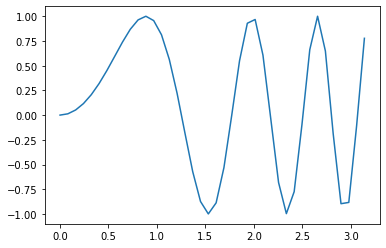

In [42]:
plt.plot(xI,yI)
plt.show()

So that is our data. Now we want to make a function that is defined on the entire range between the endpoints of our data

------


Let's just try the `1d` interpolate function out of the box and see what it does

In [43]:
f_try = interpolate.interp1d(xI, yI)

In [44]:
x_fine=np.linspace(0,np.pi,400)

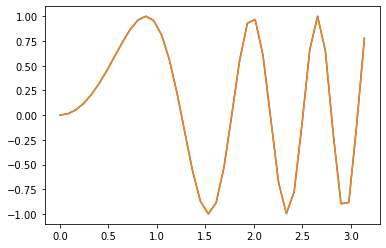

In [45]:
plt.plot(xI,yI)
plt.plot(x_fine,f_try(x_fine))
plt.show()


Okay - so it looks like our default function is just drawing straight lines between the points. This is exaclty what our plot is doing, and so we get the same sharp corners. But if we fit with a polynomial between several points, we will get a smoother looking result. E.g. using a cubic polynomial:

In [46]:
f_cube= interpolate.interp1d(xI, yI,kind='cubic')

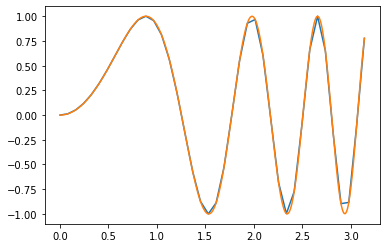

In [47]:
plt.plot(xI,yI)
plt.plot(x_fine,f_cube(x_fine))
plt.show()

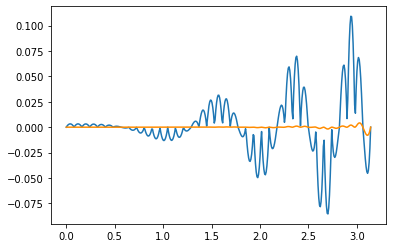

In [48]:
plt.plot(x_fine,f_try(x_fine)-np.sin(2*x_fine**2))
plt.plot(x_fine,f_cube(x_fine)-np.sin(2*x_fine**2),color='darkorange')
plt.show()

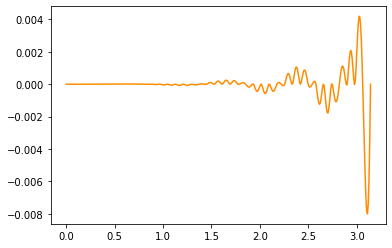

In [49]:
plt.plot(x_fine,f_cube(x_fine)-np.sin(2*x_fine**2),color='darkorange')
plt.show()

So we see that our initial function was making about a 10% error. Using a cubic instead, we get less than 1%. In fact, for the early points we do really well:

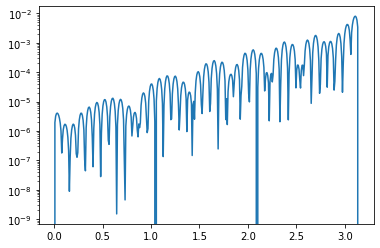

In [50]:
plt.plot(x_fine,np.abs(f_cube(x_fine)-np.sin(2*x_fine**2)))
plt.yscale('log')
plt.show()

So we are getting $1$ part in a $100,000$ up to about $x=1$ using only $40$ data points for the full range of $[0,\pi]$

Notice that the interpolation is a function. So we can also use this function inside of our solving code:

In [51]:
optimize.newton(f_cube,1)

1.2532996656450621

In [52]:
np.sin(2*1.2532996656450606**2)

7.254977768854082e-05

The interpolating function we created can be defined beyond the region of our data. After all, we are just fitting a polynomial, so the polynomial itself can be used anywhere. We can use this to extrapolate beyond the points we originally took our data as follows:

In [53]:
f_ext=interpolate.interp1d(xI,yI,fill_value='extrapolate',kind='cubic')

Let's see what happens when we go to negative values of  given that we only used positive values initially:

In [54]:
x_neg=np.linspace(-np.pi,np.pi,400)

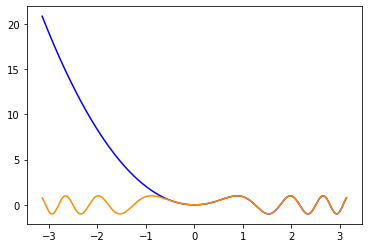

In [55]:
plt.plot(x_neg,f_ext(x_neg),color='blue')
plt.plot(x_neg,np.sin(2*x_neg**2),color='darkorange')
plt.show()

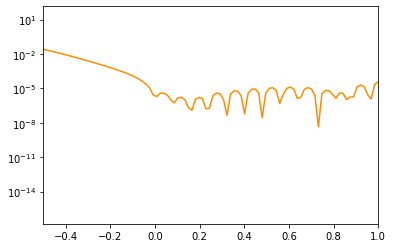

In [56]:
plt.plot(x_neg,abs(f_ext(x_neg)-np.sin(2*x_neg**2)),color='darkorange')
plt.yscale('log')
plt.xlim(-0.5,1)
plt.show()

We see pretty good agreement for some negative values of $x$ before the true answer and our intepolation diverge.

## Operations on functions / interpolations

One of the central reasons to use a spline is to a approximate a quantity we don't know exactly. For example, Scipy has a built in function that computes a numerical derivative

In [57]:
from scipy.misc import derivative

In [58]:
def g(x):
    return x**3

In [59]:
derivative(g,1,dx=1e-5)

3.000000000097369

We could make our own very simple version:

In [60]:
def my_derivative(g,x0,dx):
    return (g(x0+dx)-g(x0-dx))/(2*dx)

In [61]:
my_derivative(g,1,dx=1e-5)

3.000000000097369

We matched the result exactly. Of course, that is just the default, derivative has many ways to improve. E.g. we can include more than just the difference of two poitns but include more points:

In [62]:
derivative(g,1,dx=1e-5,order=7)

3.0000000000075104

Of course, we notice that this just returns a number for a single point. However, if we wanted the derivative as a function we could just take a bunch of derivatives and make an interpolating function:

In [63]:
def h(x):
    return np.sin(2*x**2)

In [64]:
dh=np.zeros(len(xI))
for i in range(len(xI)):
    dh[i]=derivative(h,xI[i],dx=1e-5,order=7)
dh_fnc=interpolate.interp1d(xI,dh,kind='cubic')

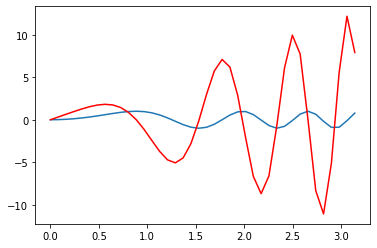

In [65]:
plt.plot(xI,h(xI))
plt.plot(xI,dh_fnc(xI),color='red')

Now we can look for maxima

In [66]:
max_h=optimize.newton(dh_fnc,1.2)
print(max_h)

0.8862269058150533


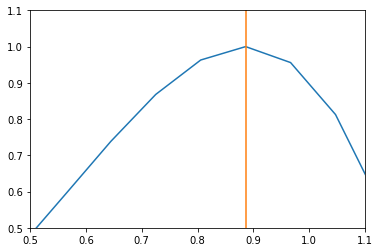

In [67]:
plt.plot(xI,h(xI))
plt.plot([max_h,max_h],[-1,1.5])
plt.xlim(0.5,1.1)
plt.ylim(0.5,1.1)
plt.show()

## Special Functions

A common thing one encounters in physics is the need to use special functions. Many of these are implemented in scipy for us

In [68]:
from scipy import special as sp

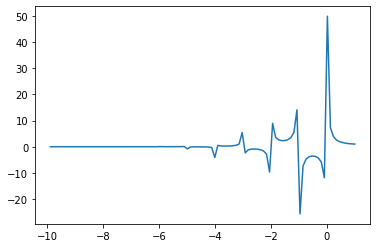

In [69]:
x=np.linspace(-10,1,102)
plt.plot(x,sp.gamma(x))

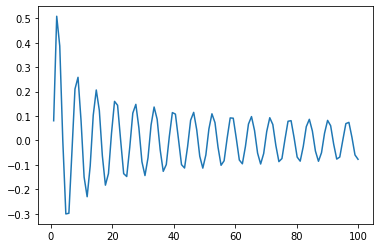

In [70]:
x=np.linspace(0,100,102)
plt.plot(x,sp.y0(x))

We don't have a particular use for them right now, but this is something you will need in most scientific applications.

It is also worth noting that these functions are defined in terms of complex arguments as well

In [71]:
sp.gamma(-1+0.1j)

(-0.4177906356943205+9.86028723231441j)

The behavior of functions for complex arguments is a very important subject

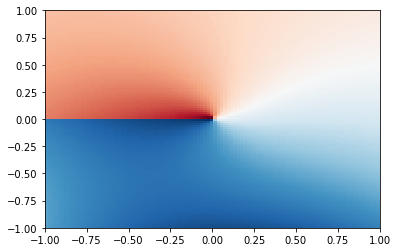

In [73]:
x=y=np.linspace(-1,1,102)
X,Y=np.meshgrid(x,y)
plt.pcolor(X,Y,np.real(sp.hankel1(0.2,X+(0+1j)*Y)),cmap='RdBu')

Scipy does not define all special functions for complex values:

# Summary

We are going to see that scipy has a lot of built in code that is extremely powerful. It is essentially built on top of numpy so they tend to work very well together. What we hopefully learned in these examples is that there are really two things going on inside scipy: (1) an algorithm and (2) an implementation of the algorithm in terms of code. The algorithm works on some premise that we can and should understand. We can try our own version of the algorithm to get a deeper understanding of what scipy is doing. Fundamentally, scipy is not doing anything deeper or more sophisticed than what we can code ourselves. What scipy has really done is code it in a very fast way (probably using some neat python/C tricks we don't know) and with lots of built in options that would be time consuming for us to do ourselves.